In [1]:
# importing the necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
# import the dataset csv file:

df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.70,1.44,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.43,1.36,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.10,1.61,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.14,1.39,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.43,1.20,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [12]:
#adding months and years to the df:

date_col = pd.DatetimeIndex(df['dt'])
df['Year'] = date_col.year
df['Month'] = date_col.month
df.head(13)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1849-01-01,26.70,1.44,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,1
1,1849-02-01,27.43,1.36,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,2
2,1849-03-01,28.10,1.61,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,3
3,1849-04-01,26.14,1.39,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,4
4,1849-05-01,25.43,1.20,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,5
5,1849-06-01,24.84,1.40,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,6
6,1849-07-01,24.06,1.25,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,7
7,1849-08-01,23.58,1.26,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,8
8,1849-09-01,23.66,1.23,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,9
9,1849-10-01,25.26,1.18,Abidjan,Côte D'Ivoire,5.63N,3.23W,1849,10


In [31]:
# go for 5 random countries, and visualize their Average Temperature by Major Cities:

pd.set_option('display.precision', 2) #pd dataframe precision set to 2 decimals. 

df_2count = df.loc[((df['Country'] == 'Brazil') | (df['Country'] == 'Canada') | (df['Country'] == 'Germany') | (df['Country'] == 'Ukraine') | (df['Country'] == 'United Kingdom'))]
df_2count[['Country','City','AverageTemperature']] 

df_2count_gr_c = pd.DataFrame(df_2count.groupby(['Country', 'City'])['AverageTemperature'].mean()) # make a groupby for the mean temperatures

#also, let add the longitude and latitude values for these cities (so it is easier to process it, than "3.23W")

df_2count_gr_c['Latitude'] = [-19.9173,-15.8267,-3.7327,-22.9068,-12.9778,-23.5558,45.5019,45.6532,52.5200,50.4504,51.5072]
df_2count_gr_c['Longitude'] =  [-43.9346,-47.9218,-38.5269,-43.1729,-38.5016,-46.6396,-73.5674,-79.3832,13.4050,30.5245,-0.1276]

df_2count_gr_c.reset_index(inplace=True)
df_2count_gr_c.columns = ['Country','City','AverageTemperature','Latitude','Longitude'] #properly reset the column names

df_2count_gr_c



,Country,City,AverageTemperature,Latitude,Longitude
0,Brazil,Belo Horizonte,21.07,-19.92,-43.93
1,Brazil,Brasília,21.73,-15.83,-47.92
2,Brazil,Fortaleza,27.01,-3.73,-38.53
3,Brazil,Rio De Janeiro,23.79,-22.91,-43.17
4,Brazil,Salvador,24.66,-12.98,-38.50
5,Brazil,São Paulo,19.70,-23.56,-46.64
6,Canada,Montreal,4.45,45.50,-73.57
7,Canada,Toronto,5.77,45.65,-79.38
8,Germany,Berlin,8.92,52.52,13.40
9,Ukraine,Kiev,7.04,50.45,30.52


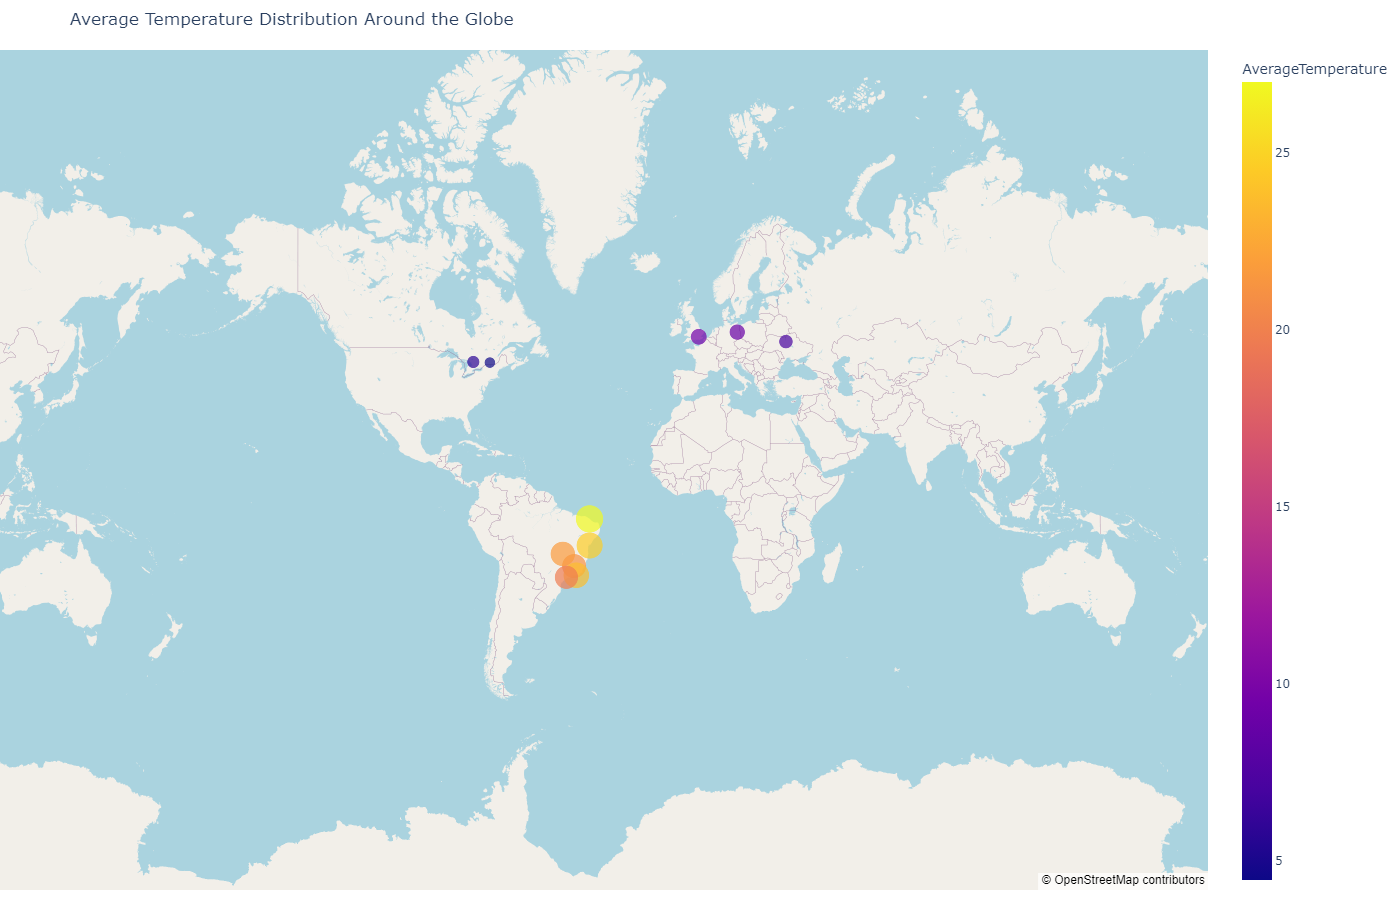

In [37]:
fig = px.scatter_mapbox(
    df_2count_gr_c,
    lon = df_2count_gr_c['Longitude'],
    lat = df_2count_gr_c['Latitude'],
    zoom = 1,
    color = df_2count_gr_c['AverageTemperature'],
    size = df_2count_gr_c['AverageTemperature'], #size, color for argument
    width = 1200,
    height = 900,
    hover_name = df_2count_gr_c['City'],
    title = 'Average Temperature Distribution Around the Globe'
    )
fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin={"r":0, "t": 50, "l":0, "b": 10}) # setting right, top, left and bottom margins

fig.show()

        